# ENEL 645 - Assignment 1

## Adam Kerr - 10146363

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pomegranate import *

## Part I: Learning and data exploration with Naïve Bayes
### 1) Please download the “heart.csv’ file. Data preprocessing with pandas: From the tutorial, please modify the code to do the following.
#### a. Read the data from csv file.

In [2]:
df = pd.read_csv('heart.csv') 

#remove samples where chest pain = 4 (NaN in original data)
d = df['ca'] != 4
df = df[d]

#remove samples where thal = 0. (NaN in original data)
d2 = df['thal'] !=0
df = df[d2]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### b. Read selected columns (attributes) and the label as attribute 14.

In [3]:
x = df.loc[:,:'thal']
y = df.loc[:,'target']

#### c. Form a numpy array

In [4]:
x = x.to_numpy()
y = y.to_numpy()

#### d. Split into training, testing sets with the data. Use 20% as the testing ratio. 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
y_train = y_train.ravel()
y_test = y_test.ravel()

#### e. Apply standardization.

In [6]:
from sklearn.preprocessing import StandardScaler as ss
scaler = ss()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 2) Implement the Naïve bayes classifier with Gaussian assumption of the features.

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train_scaled, y_train).predict(x_test_scaled)

num_points = y_test.shape[0]

#### a. Confusion matrix

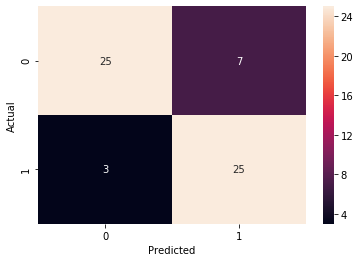

In [8]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True)
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

#### b. Output probability of heart disease

In [9]:
y_prob = gnb.predict_proba(x_test_scaled)
y_prob = np.array(y_prob)
print(y_prob[:,1])

[1.82947186e-01 1.31028856e-04 9.92651522e-01 1.82572686e-06
 6.69690800e-01 9.94503128e-01 1.23790851e-04 9.83867616e-01
 1.03406347e-03 9.88223104e-01 9.83944835e-01 9.96653588e-01
 9.98635853e-01 8.76821351e-01 9.92987520e-01 2.42050827e-04
 2.22278338e-04 2.14585290e-02 9.97627454e-01 9.32641657e-01
 9.99723205e-01 4.21293920e-03 9.99519661e-01 1.19553898e-02
 1.15646195e-04 2.35676864e-02 9.98762576e-01 1.59274740e-09
 9.12156995e-01 2.78063161e-03 9.17778132e-01 4.00754272e-05
 9.99652970e-01 9.98524975e-01 3.71975498e-02 3.26709738e-01
 6.01690130e-01 2.33157818e-02 9.13165146e-01 9.96952892e-01
 3.61037727e-03 9.98690379e-01 4.40433700e-05 9.86954796e-01
 9.75436577e-01 5.74694463e-01 9.83936164e-01 6.04848758e-04
 9.33221841e-01 9.99582447e-01 1.52580527e-03 1.51592238e-01
 9.63930931e-01 6.79059570e-01 3.33933555e-01 3.31308309e-09
 6.30867350e-02 1.11435684e-06 7.74241304e-01 4.15773389e-04]


### 3) We will be doing an analysis on the 13 features and class labels.
#### a. Look at the class distributions of the model for each feature as shown in the tutorial.
#####     i. Choose three features that have more “separable” class distributions. 

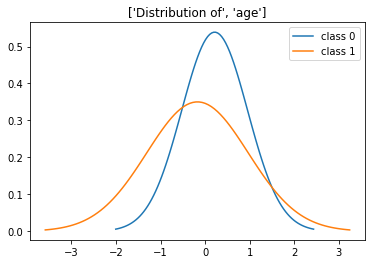

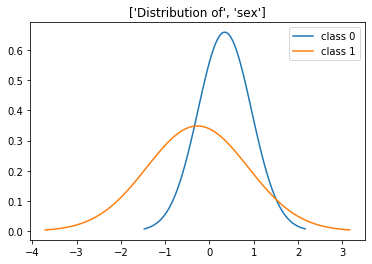

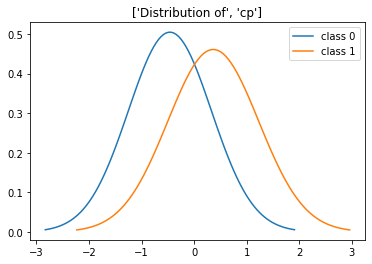

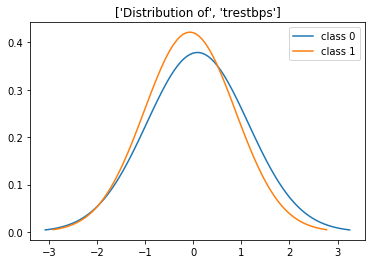

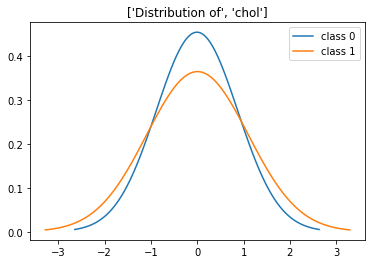

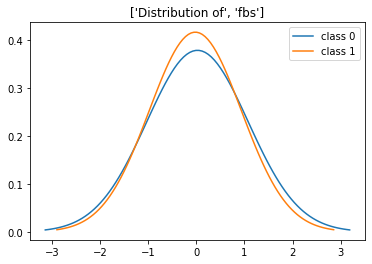

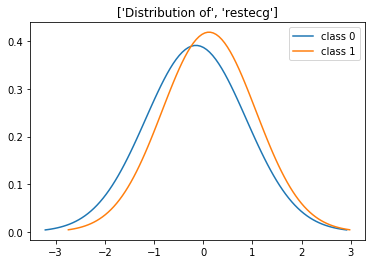

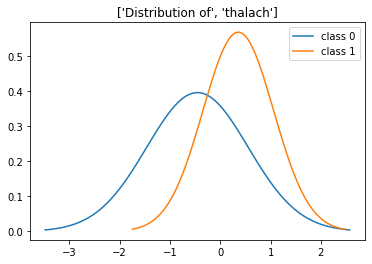

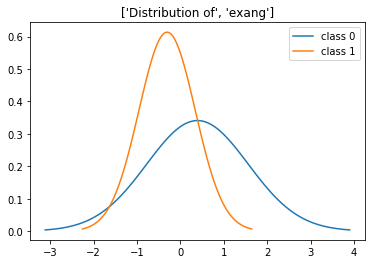

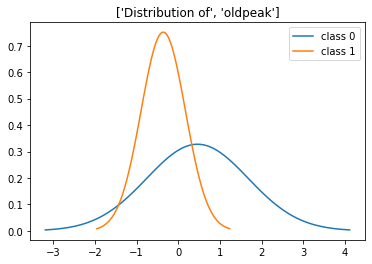

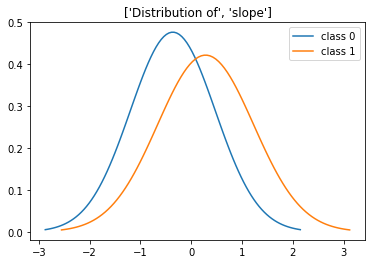

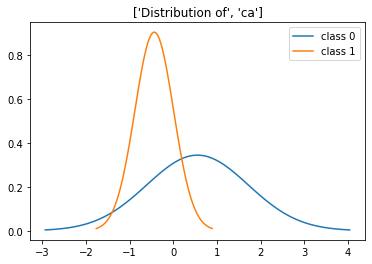

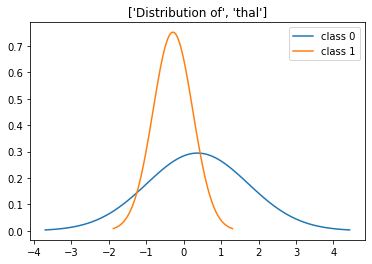

<Figure size 432x288 with 0 Axes>

In [10]:
import scipy.stats as stats
#first column of theta and sigma corresponds to the feature 0.
#So change the rows in the loop to plot class conditional per feature.
for j in range(0,13):
 for i in range(0,2):
  mu = gnb.theta_[i][j]
  #print(mu)
  sigma = gnb.sigma_[i][j]
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))

 plt.title(['Distribution of', df.columns[j]])
 plt.legend(['class 0','class 1'])
 plt.figure()  #note there will be an extra unused figure at the end.
plt.show()

#### b. Use three features of your choice to implement a new Naïve bayes classifier. 
    Chosen features: 9, 11, 12

In [11]:
selected_attributes = [9,11,12]
x2_train_scaled = x_train_scaled[:, selected_attributes]
x2_test_scaled = x_test_scaled[:, selected_attributes]

gnb2 = GaussianNB()
y2_pred = gnb2.fit(x2_train_scaled, y_train).predict(x2_test_scaled)

#### c. Compare this to use the following 4 attributes:
#####     i. Implement a Naïve bayes using a selected 4 attributes ('trestbps', 'chol','fbs', 'restecg'). 

In [12]:
# 'trestbps', 'chol','fbs', 'restecg' correspond to 3, 4, 5, 6
x3_train_scaled = x_train_scaled[:,3:7]
x3_test_scaled = x_test_scaled[:,3:7]

gnb3 = GaussianNB()
y3_pred = gnb3.fit(x3_train_scaled, y_train).predict(x3_test_scaled)

### 4) Answer the following: 
#### a. From 3.i. Which features are a better predictor of heart disease, and which features are worse at discriminating from this analysis? Please explain any criteria you used.

'trestbps', 'chol','fbs'and 'restecg' are worse at predicting due to the probability distributions for both classes basically overlapping. 'oldpeak', 'ca', and 'thal' are better because the distributions overlap less, allowing for the model to better discriminate between the two classes. This is reinforced by that accuracy of the models trained on the aforementioned atrributes as seen in 4b and 4c.

#### b. Output the confusion matrix of your classifier for full (all 13 attributes), your selected 3, and attributes from 3.c ('trestbps', 'chol', 'fbs', 'restecg')

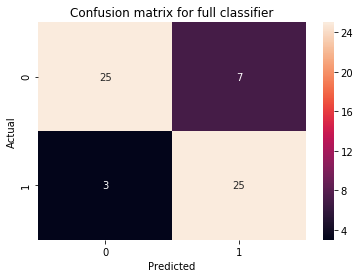

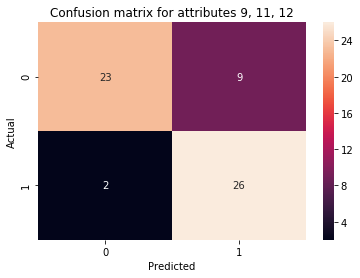

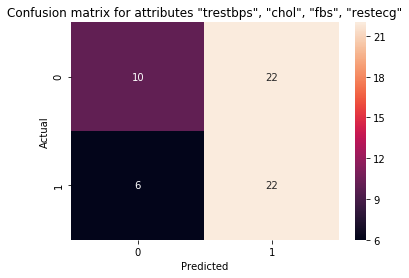

In [13]:
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.heatmap(df_cm, annot=True)
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for full classifier')

fig, ax = plt.subplots()
cm2 = confusion_matrix(y_test, y2_pred)
df_cm2 = pd.DataFrame(cm2, range(2), range(2))
sn.heatmap(df_cm2, annot=True)
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for attributes %s' % (", ".join(str(attr) for attr in selected_attributes)))

fig, ax = plt.subplots()
cm3 = confusion_matrix(y_test, y3_pred)
df_cm3 = pd.DataFrame(cm3, range(2), range(2))
sn.heatmap(df_cm3, annot=True)
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for attributes "trestbps", "chol", "fbs", "restecg"')
plt.show()

#### c. What is the classification accuracy of the algorithm on test dataset with full attributes, selected 3, and the attributes from 3.c. ('trestbps', 'chol', 'fbs', 'restecg').? Explain why the accuracy decreases or increases.

In [14]:
print("Model 1")
num_incorrect = (y_test != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d" % (num_points,num_incorrect))
print("Model accuracy is %f %%\n" % ((num_points - num_incorrect) / num_points * 100))

print("Model 2")
num_incorrect2 = (y_test != y2_pred).sum()
print("Number of mislabeled points out of a total %d points : %d" % (num_points,num_incorrect2))
print("Model accuracy is %f %%\n" % ((num_points - num_incorrect2) / num_points * 100))

print("Model 3")
num_incorrect3 = (y_test != y3_pred).sum()
print("Number of mislabeled points out of a total %d points : %d" % (num_points,num_incorrect3))
print("Model accuracy is %f %%\n" % ((num_points - num_incorrect3) / num_points * 100))

Model 1
Number of mislabeled points out of a total 60 points : 10
Model accuracy is 83.333333 %

Model 2
Number of mislabeled points out of a total 60 points : 11
Model accuracy is 81.666667 %

Model 3
Number of mislabeled points out of a total 60 points : 28
Model accuracy is 53.333333 %



The best accuracy is with the full attribute set as the model has the most information. The model with the selected three attributes works better than the selected four likely due to the selected three being more easily differentiated between the two classes, providing more accurate classfication. 

#### d. Determine the output probabilities of a patient with the following 13 attributes:
##### i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2] 

In [15]:
x_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2]).reshape(1,-1)
x_patient_scaled = scaler.transform(x_patient)
x_patient_prob = gnb.predict_proba(x_patient_scaled)
print(x_patient_prob)

[[0.01605516 0.98394484]]


##### ii. Suppose the ST depression induced by exercise readings kept increasing at a rate of 0.1 between [0 – 4]. Determine the probability of heart disease at each reading with this patient and plot. 

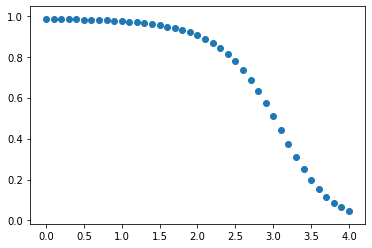

In [16]:
sts = [x / 10 for x in range(0,41)]
probs = []
for st in sts:
    x_patient = np.array([57,0,1,130,236,0,0,174,0,st,1,1,2]).reshape(1,-1)
    probs.append(gnb.predict_proba(scaler.transform(x_patient))[0][1])
    
plt.scatter(sts, probs)
plt.show()

#### e. If we are given a heart disease patient with age = 40. Is it possible to infer the probability of male from the model? Why or why not? If so, what is the probability of male and how would it be formulated as an input in the model?

No, there is no way to infer the probability of male from this model. It requires values for all the attributes to be a valid sample.

The probability can however be infered from the data:
$$
P(sex=1|target=1,age=40) 
= \frac{P(target=1,age=40|sex=1)P(target=1,age=40)}{P(sex=1)}$$

$$= \frac{P(target=1|sex=1)P(target=1)P(age=40|sex=1)P(age=40)}{P(sex=1)}
$$

#### f. What assumptions did we make for this model?

In the model it is assumed that each attribute is independent as is necessary for the Naive Bayes. This may not be the case in real life.

#### g. What other approaches, or modifications could we have done in a Naïve bayes model? In other words, what parameters can we change? (Note the suggested revisions may not necessarily be implemented in the library yet)

We could potentially change the weighting of each sample when training the model, however we lack any way to decide which samples would have an increased weighting, if any. 

## Part II. Bayes nets
Part I familiarized with how to read the data and infer probabilities using a Naïve model where
each attribute is independent. Now, we extend to conditional models in a tree-like structure.
### 1) Convert the attributes to a discrete variable using binning approach shown in tutorial. Let us use k=5 bins.
#### a. Note: In Bayes Net we will use the categories as an attribute, so there are 13+1 = 14 total features. Replace the last attribute with the original categories [0,1] after binning.

In [17]:
from sklearn import preprocessing

data = df.to_numpy()

discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform').fit(data)
data_binned = discretizer.transform(data)

data_binned[:,-1] = data[:,-1]

### 2) Run code using exact search on Bayes net to get the structure of nodes.
#### a. Note this approach does not assume the classification attribute has to be in the final output node, as this Bayes Net is used to learn the structure of the problem and relationships between variables/nodes

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_binned, y, test_size = 0.2, random_state = 0)

model = BayesianNetwork.from_samples(x_train, algorithm='exact')

### 3) Answer the following:
#### a. What is the classification accuracy of the algorithm with full attributes?

In [19]:
x_test[:,-1] = None
predictions = model.predict(x_test)
predictions = np.array(predictions)

y_pred = np.array(predictions[:,-1])
y_pred = y_pred.astype(int)

num_incorrect = (y_test != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d" % (num_points,num_incorrect))
print("Model accuracy is %f %%\n" % ((num_points - num_incorrect) / num_points * 100))

Number of mislabeled points out of a total 60 points : 8
Model accuracy is 86.666667 %



#### b. Determine the heart disease probabilities of a patient with the following 13 attributes:
##### i. X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2] 

In [20]:
x_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2,0]).reshape(1,-1)
x_patient = discretizer.transform(x_patient)
x_patient[0,-1] = None

model.predict_proba(x_patient)

[array([2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 1.0, 2.0,
        {
     "class" :"Distribution",
     "dtype" :"numpy.float64",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "0.0" :0.16170810889440446,
             "1.0" :0.8382918911055954
         }
     ],
     "frozen" :false
 }], dtype=object)]

#### c. Infer the probability of heart disease given [Age = 40, male, asymptomatic chest pain].

In [21]:
x_patient = np.zeros((1,14))
x_patient[0,[0,1]] = 40,1 

x_patient = discretizer.transform(x_patient)
x_patient[0,[1]] = None
x_patient[0,3:] = None

pred = model.predict_proba(x_patient)
print(pred[-1][-1])

{
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0.0" :0.7037037037037035,
            "1.0" :0.2962962962962965
        }
    ],
    "frozen" :false
}


#### d. If we are given a heart disease patient with age = 40. Can we tell the probability of male from the model? If so, what is the probability of male and how would it be formulated as an input in the model?

In [22]:
x_patient = np.zeros((1,14))
x_patient[0,0] = 40

x_patient = discretizer.transform(x_patient)
x_patient[0,1:-1] = None
x_patient[0,-1] = 1
pred = model.predict_proba(x_patient)
print(pred[-1][1])

{
    "class" :"Distribution",
    "dtype" :"numpy.float64",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "0.0" :0.39953616769400324,
            "4.0" :0.6004638323059968
        }
    ],
    "frozen" :false
}


There is an 60% chance that the patient is male.

#### e. What assumptions did we make for this model?

It is assumed that the casual relationships between the attributes as discovered by the model are accurate but this may not really be the case.

#### f. What other approaches, or modifications could we have done in a Bayesian Network model? In other words, what parameters can we change? (Note the suggested revisions may not necessarily be implemented in the library yet)

As with the Naïve bayes model we could have added sample weights. We could also have changed with algorithm that the model uses to determine the structure of the graph or constrained which nodes can be parents of other nodes.